# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [19]:
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [20]:
# Import data and normalize TimeMin
data_train = pd.read_csv('data/dataset_1_train.txt')
data_test = pd.read_csv('data/dataset_1_test.txt')
data_train['TimeMin'] = data_train['TimeMin'] / 1440
data_test['TimeMin'] = data_test['TimeMin'] / 1440

In [21]:
print('train:')
print(data_train.shape)
print(data_train.head())
print(data_train.dtypes)
print('test:')
print(data_test.shape)
print(data_test.head())
print(data_test.dtypes)

train:
(250, 2)
    TimeMin  PickupCount
0  0.597222         33.0
1  0.011806         75.0
2  0.337500         13.0
3  0.208333          5.0
4  0.267361         10.0
TimeMin        float64
PickupCount    float64
dtype: object
test:
(1000, 2)
    TimeMin  PickupCount
0  0.642361         43.0
1  0.388194         33.0
2  0.886806         41.0
3  0.773611         61.0
4  0.544444         29.0
TimeMin        float64
PickupCount    float64
dtype: object


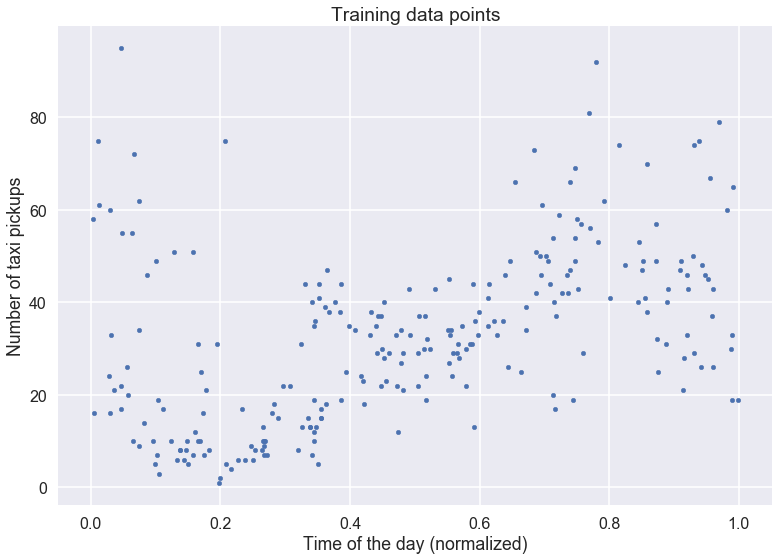

In [22]:
# Visualize training data points
data_train.plot.scatter(0, 1);
plt.xlabel('Time of the day (normalized)');
plt.ylabel('Number of taxi pickups');
plt.title('Training data points');

The pattern of taxi pickups make intuitive sense to me since the peaks in the graph correspond to rush hours (at morning and evening).

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

In [23]:
# Fit k-NN regression models
X_train, y_train = data_train[['TimeMin']].values, data_train['PickupCount'].values
X_test, y_test = data_test[['TimeMin']].values, data_test['PickupCount'].values
k_list = [1, 2, 10, 25, 50, 100, 200]
kNN_models = [KNeighborsRegressor(n_neighbors=k) for k in k_list]
[kNN_model.fit(X_train, y_train) for kNN_model in kNN_models]

[KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform'),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform'),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
 KNei

When we invoke the `fit` function, we fit the model using $X$ as training data (to determine the nearest neighbors) and $y$ as target values (to calculate the predicted response based on the average of the observed response of the $k$-nearest neighbors); $X$ and $y$ would be checked and the fitting algorithm would be determined based on $k$ and $n$.

If we use $k = n$, all observations would become the nearest neighbors and the predicted response would thus be a fixed value (the average response of all observations) for different observations (a horizontal straight line).

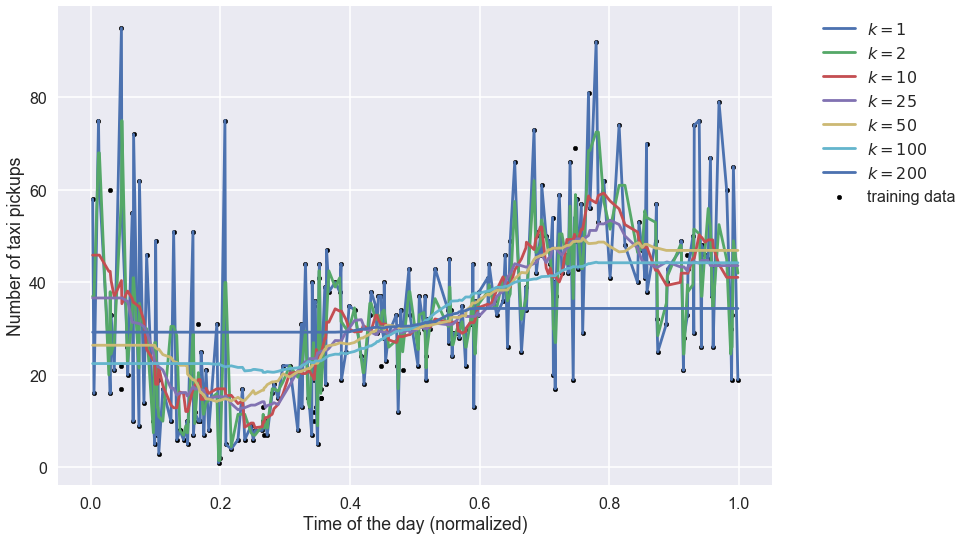

In [24]:
# Visualization
X_train_sorted = sorted(X_train)
data_train.plot.scatter(0, 1, color='k', label='training data');
[plt.plot(X_train_sorted, kNN_model.predict(X_train_sorted), label='$k={}$'.format(k_list[i])) \
 for i, kNN_model in enumerate(kNN_models)]
plt.xlabel('Time of the day (normalized)');
plt.ylabel('Number of taxi pickups');
plt.legend();
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

The fitted line becomes "smoother" as $k$ increases. A larger $k$ suppresses the effects of noise, but the predicted response deviates a lot from the actual response and converges to the average response of all observations when $k$ is too big.

When k is small, the fitted model is overfit since it greatly depends on the values of neighbours. For example, when k = 1, the fitted value is the true value itself, which lose the meaning of fitting model. While k is large, then the fitted model is underfit. The prediction tends to converge to the mean of the samples.

In [25]:
# Evaluation
train_kNN_R_sq = [kNN_model.score(X_train, y_train) for kNN_model in kNN_models]
test_kNN_R_sq = [kNN_model.score(X_test, y_test) for kNN_model in kNN_models]
for i in range(len(k_list)):
    print('When k = {}, the training R^2 is {}; the test R^2 is {}.'.format(k_list[i], train_kNN_R_sq[i], test_kNN_R_sq[i]))

When k = 1, the training R^2 is 0.8108889086047287; the test R^2 is -0.04560301563038216.
When k = 2, the training R^2 is 0.6454040692744734; the test R^2 is 0.23298509885774188.
When k = 10, the training R^2 is 0.45770521849580365; the test R^2 is 0.41724791407053397.
When k = 25, the training R^2 is 0.4194670658749883; the test R^2 is 0.41365598420422983.
When k = 50, the training R^2 is 0.35325229524195634; the test R^2 is 0.38047568461148934.
When k = 100, the training R^2 is 0.2870278573586439; the test R^2 is 0.3118464863374867.
When k = 200, the training R^2 is 0.10863100988399976; the test R^2 is 0.10953014692642915.


 Negative $R^2$ score means the square error of the models are too large to be suitable (even worse than just taking average). When $k=2$, the test $R^2$ is negative, which indicates the model fits worse than a horizontal straight line corresponding to the average response of all observations. 
 
 A $R^2$ score of 0 means the fitted model is nearly a horizontal straight line corresponding to the average response of all observations.

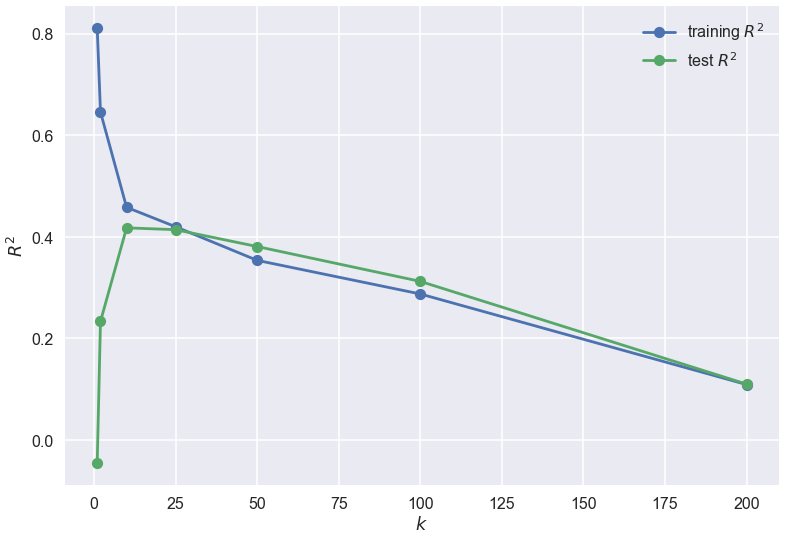

In [26]:
# Evaluation visualization
plt.plot(k_list, train_kNN_R_sq, 'o-', label='training $R^2$');
plt.plot(k_list, test_kNN_R_sq, 'o-', label='test $R^2$');
plt.xlabel('$k$');
plt.ylabel('$R^2$');
plt.legend();

As we can see, the training and test $R^2$ plots exhibit different trends; the training $R^2$ decreases as $k$ increases, while there is a peak for the test $R^2$ plot and the test $R^2$ decreases as $k$ deviates from the peak.

In other words, as k increases, the $R^2$ score for training data first increases while the $R^2$ score for test data first drops. Then both of them decrease together. 

For the different trends when k is less than 25, this is result from overfitting. Then the decline in the later time is due to underfitting.

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [27]:
# Fit a linear regression model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           3.43e-14
Time:                        20:03:24   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.000      13.850      22.203
x1            30.2890      3.762      8.051      0.000      22.879      37.699
==============================================================================
Omnibus:                       56.951   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.977
Skew:                           1.202   Prob(JB):                     7.18e-23
Kurtosis:                       5.002   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)
print('The training R^2 is {}.'.format(r2_score(y_train, y_train_pred)))
print('The test R^2 is {}.'.format(r2_score(y_test, y_test_pred)))

The training R^2 is 0.20721375209894033.
The test R^2 is 0.24771232994848624.


The test $R^2$ score (0.2477) is worse than the best test $R^2$ value (0.4172) obtained from kNN regression (when $k=10$).

In [29]:
print('The slope of the fitted linear model is {}; the intercept of the fitted model is {}.'.format(results.params[1], \
                                                                                                   results.params[0]))

The slope of the fitted linear model is 30.289022986312723; the intercept of the fitted model is 18.026385175716992.


The sign of the slope indicates there is a positive correlation between the number of pickups and the time of the day.

In [30]:
ci = results.conf_int(alpha=0.05)
print('The 95% confidence interval for the slope is [{}, {}];\
the 95% confidence interval for the intercept is [{}, {}].'.format(ci[1, 0], ci[1, 1], ci[0, 0], ci[0, 1]))

The 95% confidence interval for the slope is [22.87931900428816, 37.69872696833729];the 95% confidence interval for the intercept is [13.849864719084664, 22.20290563234932].


## According to the information, we can consider the estimates of model parameters to be reasonably reliable.

## It's not reliable. We can not expect that as the time increases, the number of taxi increases at a rate of 22 to 37.

Looser. Because 99% confidence interval means there is 99% probability that the true parameter lies in this interval, which has higher probability than 95%. A 99% confidence interval should be looser than the 95% confidence interval since a higher confidence level requires a broader range.

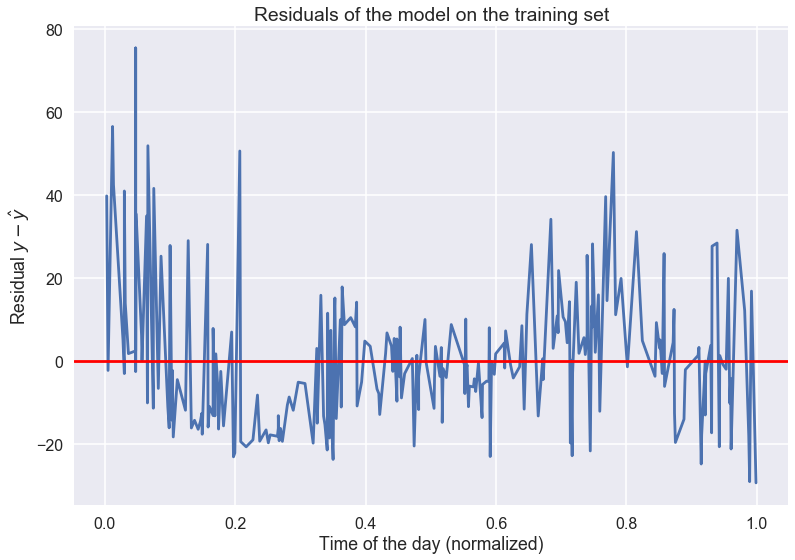

In [31]:
data_train_sorted = data_train.sort_values('TimeMin')
data_test_sorted = data_test.sort_values('TimeMin')
X_train_sorted = sm.add_constant(data_train_sorted[['TimeMin']].values)
y_train_sorted = data_train_sorted['PickupCount'].values
y_train_sorted_pred = results.predict(X_train_sorted)
plt.plot(X_train_sorted[:, 1], y_train_sorted-y_train_sorted_pred);
plt.axhline(y=0, color='r');
plt.xlabel('Time of the day (normalized)');
plt.ylabel('Residual $y-\hat{y}$');
plt.title('Residuals of the model on the training set');

The assumption of linearity is valid for the data at the middle of the day but not for the data at both ends of the day since the residuals are closer to zero at the middle of the day (from 0.3 to 0.7) than other part of the day.

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

### Answers:

We think a polynomial degree of 3 would provide the best fit for the data by visual inspection since there seems to be 2 extreme points.

If the time predictor hadn't been normalized, the design matrix would be ill-conditioned when the polynomial degree is large. The terms which is greater than 1 with higher order would dominate.

In [32]:
# Fit polynomial regression models
X_train_sorted = data_train_sorted[['TimeMin']].values
y_train_sorted = data_train_sorted['PickupCount'].values

poly_degrees = [2, 3, 10, 25, 50]
train_design_matrices = [PolynomialFeatures(d).fit_transform(X_train_sorted) for d in poly_degrees]
results = [sm.OLS(y_train_sorted, design_matrix).fit() for design_matrix in train_design_matrices]
y_train_preds = [results[i].predict(train_design_matrices[i]) for i in range(len(poly_degrees))]

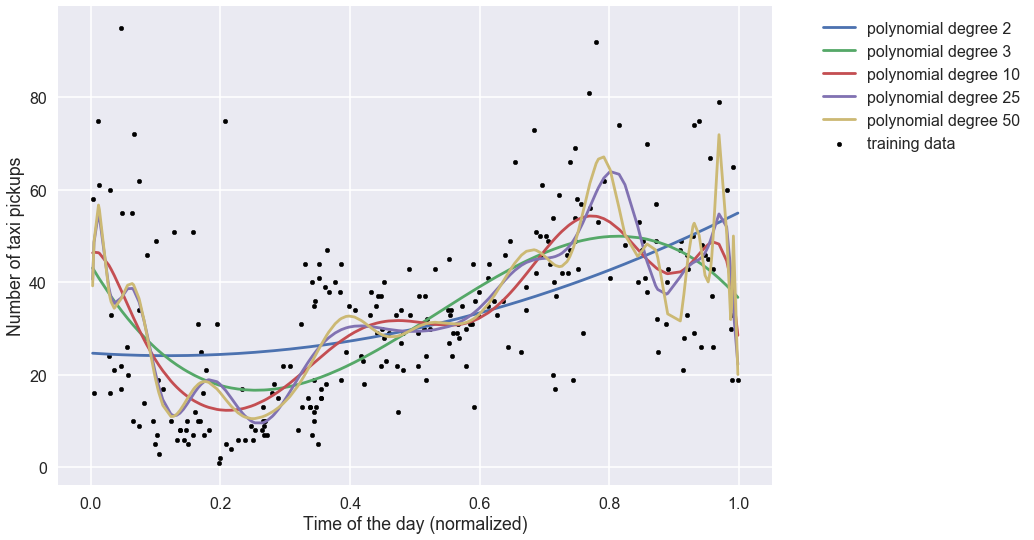

In [33]:
# Visualizations
data_train_sorted.plot.scatter(0, 1, color='k', label='training data');
#plt.scatter(data_test['TimeMin'], data_test['PickupCount'], marker='.', label='test data');
[plt.plot(X_train_sorted, y_train_pred, label = 'polynomial degree {}'.format(poly_degrees[i])) \
 for i, y_train_pred in enumerate(y_train_preds)];
plt.legend();
plt.xlabel('Time of the day (normalized)');
plt.ylabel('Number of taxi pickups');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [35]:
# Evaluations
X_test_sorted = data_test_sorted[['TimeMin']].values
y_test_sorted = data_test_sorted['PickupCount'].values

test_design_matrices = [PolynomialFeatures(d).fit_transform(X_test_sorted) for d in poly_degrees]

y_test_preds = [results[i].predict(test_design_matrices[i]) for i in range(len(poly_degrees))]
train_r2s = [r2_score(y_train_sorted, y_train_pred) for y_train_pred in y_train_preds]
test_r2s = [r2_score(y_test_sorted, y_test_pred) for y_test_pred in y_test_preds]

[print('Polynomial degree {}: training r^2 is {}; test r^2 is {}.'.format(poly_degrees[i], train_r2s[i], test_r2s[i]))\
for i in range(len(poly_degrees))];

Polynomial degree 2: training r^2 is 0.2324332710285808; test r^2 is 0.25572414216191597.
Polynomial degree 3: training r^2 is 0.3748362391177078; test r^2 is 0.37858436224816694.
Polynomial degree 10: training r^2 is 0.42827706862376547; test r^2 is 0.4020078006979584.
Polynomial degree 25: training r^2 is 0.46328242503535977; test r^2 is 0.38362999043154755.
Polynomial degree 50: training r^2 is 0.4891540481235198; test r^2 is 0.3331609098103052.


In [43]:
results[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     17.90
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           3.13e-24
Time:                        20:05:05   Log-Likelihood:                -1019.3
No. Observations:                 250   AIC:                             2061.
Df Residuals:                     239   BIC:                             2099.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0698     10.517      4.381      0.000      25.353      66.787
x1           149.3642    704.278      0.212      0.832   -1238.020    1536.749
x2         -1.172e+04   1.61e+04     -0.728      0.468   -4.34e+04       2e+04
x3          1.416e+05   1.71e+05      0.826      0.409   -1.96e+05    4.79e+05
x4         -8.966e+05      1e+06     -0.897      0.371   -2.87e+06    1.07e+06
x5          3.471e+06   3.49e+06      0.994      0.321   -3.41e+06    1.03e+07
x6         -8.463e+06   7.61e+06     -1.112      0.267   -2.35e+07    6.53e+06
x7          1.292e+07   1.04e+07      1.238      0.217   -7.64e+06    3.35e+07
x8         -1.193e+07   8.75e+06     -1.364      0.174   -2.92e+07     5.3e+06
x9          6.067e+06   4.09e+06      1.484      0.139   -1.99e+06    1.41e+07
x10        -1.303e+06   8.17e+05     -1.594      0.112   -2.91e+06    3.07e+05
==============================================================================
Omnibus:                       42.967   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.832
Skew:                           0.916   Prob(JB):                     2.07e-17
Kurtosis:                       5.004   Cond. No.                     2.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.81e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

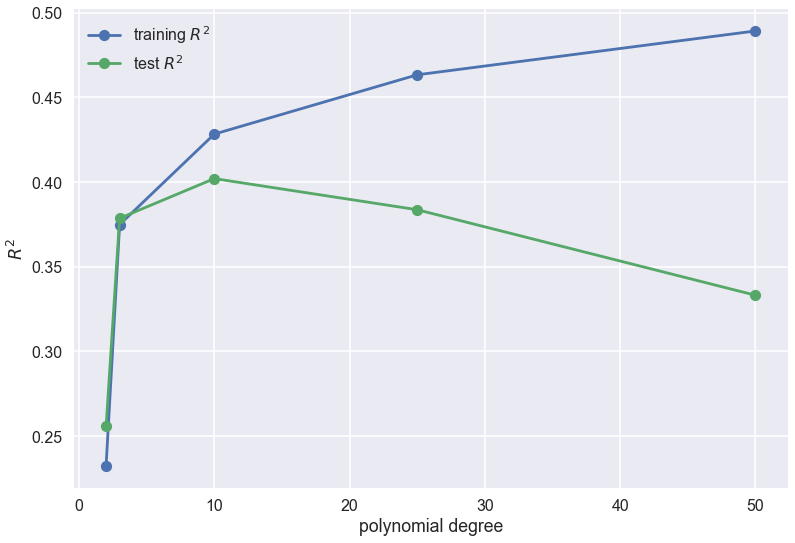

In [18]:
plt.plot(poly_degrees, train_r2s, 'o-', label='training $R^2$');
plt.plot(poly_degrees, test_r2s, 'o-', label='test $R^2$');
plt.legend();
plt.xlabel('polynomial degree');
plt.ylabel('$R^2$');

As we can see, a high training $R^2$ doesn't necessarily indicate a high test $R^2$. 

All test $R^2$ from the different polynomial models tested here are larger than the test $R^2$ from simple linear regression in Part (b).

All test $R^2$ from the different polynomial models tested here are smaller than the best test $R^2$ (0.4172) from kNN regression in Part (a).

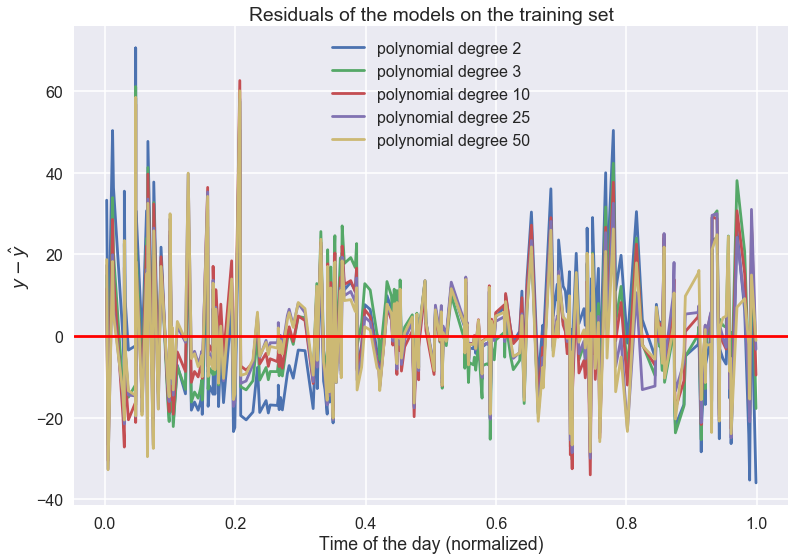

In [19]:
[plt.plot(X_train_sorted, y_train_sorted-y_train_pred, label='polynomial degree {}'.format(poly_degrees[i])) \
 for i, y_train_pred in enumerate(y_train_preds)]
plt.axhline(y=0, color='r');
plt.xlabel('Time of the day (normalized)');
plt.ylabel('$y-\hat{y}$');
plt.title('Residuals of the models on the training set');
plt.legend();

As we can see, the degree of fluctuation is smaller for larger polynomial degree, i.e., the residuals are closer to 0 for larger polynomial degree.

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



## Answer

We would choose the polynomial regression model of degree 3. Compared with simple linear regression and polynomial regression model of degree 2, the test $R^2$ is significantly higher for the polynomial regression model of degree 3; there is no significant improvement of the test $R^2$ for the polynomial regression model of higher degrees but the amount of computation would be much higher; although kNN model with $k=10$ enables higher test $R^2$, the prediction curve is not very smooth and it requires more computation.

In [20]:
ci = results[1].conf_int(alpha=0.05)
print('The CI for the constant term is [{}, {}];'.format(ci[0, 0], ci[0, 1]))
print('The CI for the linear term is [{}, {}];'.format(ci[1, 0], ci[1, 1]))
print('The CI for the quadratic term is [{}, {}];'.format(ci[2, 0], ci[2, 1]))
print('The CI for the cubic term is [{}, {}].'.format(ci[3, 0], ci[3, 1]))

The CI for the constant term is [36.25629730464913, 51.292820293408205];
The CI for the linear term is [-302.2864136423809, -171.9162139023622];
The CI for the quadratic term is [458.22715702168176, 762.625324010354];
The CI for the cubic term is [-480.67973964916393, -280.41717780241686].


According to above CIs, all the predictors are significant. The model predicts the number of taxi cab pick-ups reasonably well. We could increase the size of training set to further improve this model.

---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [21]:
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])

#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).

### Answers:
#### Q 1a
If $Y$ lies in the same subspace as the columns of $\mathbf{X}$, the prediction of $\hat{Y}$ should be identical to $Y$.

#### Q1b
Sometimes there could be some variance in terms of the quality or confidence level of the training data in a class (e.g., the quality of the face images from the same person could be different due to gesture variations, contiguous occlusion and etc.). In such cases, we could assign weights for the training data based on their quality (or some other criterias which could influence classification) and build some custom loss functions (instead of $L_2$ norm) based on the significance and weight of each training sample to take these factors into consideration.

In [22]:
# Q 1c
class LRC:
    def __init__(self, dataset, labels, y):
        self.dataset = dataset
        self.labels = labels
        self.Xs, self.classes = self.preprocess(dataset, labels)
        self.y_preds = [sm.OLS(y, X).fit().predict(X) for X in self.Xs]
        self.decision = self.classes[np.argmin([np.linalg.norm(y-y_pred) for y_pred in self.y_preds])]
    
    def preprocess(self, dataset, labels):
        classes, classes_inv, classes_cnt = np.unique(labels, return_inverse=True, return_counts=True)
        classes_ind = np.split(np.argsort(classes_inv, kind='mergesort'), np.cumsum(classes_cnt[:-1]))
        Xs = [dataset[ind, :].transpose() for ind in classes_ind]
        return Xs, classes   

In [23]:
# Classify y_0
y_0_label = LRC(dataset, labels, y_0).decision
print('y_0 belongs to S_{}.'.format(y_0_label))

y_0 belongs to S_0.


We can then try Georgia Tech face database used in the paper.

In [24]:
from skimage import color, io
from skimage.transform import rescale, resize, downscale_local_mean

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Building training and test datasets
filename_pre = 'cropped_faces/s'
class_size = 50
sample_size = 15
label_names = [str(i+1) if 2==len(str(i+1)) else '0'+str(i+1) for i in range(class_size)]
sample_names = [str(i+1) if 2==len(str(i+1)) else '0'+str(i+1) for i in range(sample_size)]

def load_image(filename):
    image = color.rgb2gray(io.imread(filename))
    image = resize(image, (15, 15))
    return np.array([image.reshape(image.size, order='F')]).transpose()

Xs_train = []
Xs_test = []
train_size = 8
test_size = sample_size - train_size

for i, label in enumerate(label_names):
    for j, sample in enumerate(sample_names):
        filename = filename_pre + label + '_' + sample + '.jpg'
        image = load_image(filename);
        if 0 == j:
            Xs_train.append(image)
        elif j < train_size:
            Xs_train[i] = np.concatenate((Xs_train[i], image), axis=1)
        elif train_size == j:
            Xs_test.append(image)
        else:
            Xs_test[i] = np.concatenate((Xs_test[i], image), axis=1)

In [27]:
# Implement LRC
def LRC_predict(y, Xs, class_names=None):
    y_preds = [sm.OLS(y, X).fit().predict(X) for X in Xs]
    decision_ind = np.argmin([np.linalg.norm(y-y_pred) for y_pred in y_preds])
    if None == class_names:
        return decision_ind
    else:
        return class_names[decision_ind]

In [28]:
train_results = [LRC_predict(Xs_train[i][:, j], Xs_train)==i for j in range(train_size) for i in range(class_size)]
print('The prediction accuracy for the training dataset is {}.'.format(np.mean(train_results)))

The prediction accuracy for the training dataset is 1.0.


In [29]:
test_results = [LRC_predict(Xs_test[i][:, j], Xs_train)==i for j in range(test_size) for i in range(class_size)]
print('The prediction accuracy for the test dataset is {}.'.format(np.mean(test_results)))

The prediction accuracy for the test dataset is 0.74.


The recoginition rate (74%) is lower than the reported rate (92.57%), which could be caused by differences in our image preprocessing procedures (downsampling and etc.).

#### Q 1d

Since $$R^2=1-\frac{\sum_{i=1}^n |y_i-\hat{y}_i|^2}{\sum_{i=1}^n |y_i-\bar{y}|^2}=1-\frac{RSS}{TSS},$$ we know
$$\frac{TSS}{RSS}=\frac{1}{1-R^2}.$$
Thus, $$F=\frac{(TSS-RSS)/J}{RRS/(n-J-1)}=\frac{(\frac{TSS}{RSS}-1)(n-J-1)}{J}=\frac{(\frac{1}{1-R^2}-1)(n-J-1)}{J}=\frac{R^2(n-J-1)}{(1-R^2)J}$$
i.e., $$F=\frac{R^2(n-J-1)}{(1-R^2)J}$$
where $J$ is the number of parameters and $n$ is the number of observations.